In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

print(data)

Input dims: 1
Output dims: 1
X: [array([[2.70606933],
       [1.40639715],
       [2.39979051],
       [3.99151227],
       [3.292798  ],
       [1.07451952],
       [3.99780778],
       [3.70770582],
       [2.15553625],
       [1.74608282],
       [3.60600465],
       [1.55464608],
       [0.53947998],
       [0.58783789],
       [2.09445058],
       [3.5018082 ],
       [2.83720487],
       [0.46778462],
       [0.83953568],
       [3.90992411]])]
Y: [array([1.50810691, 2.84554796, 2.95295672, 1.02675813, 2.77657314,
       2.13712411, 1.0976795 , 1.7617187 , 2.343019  , 1.16292772,
       2.33845936, 2.10094681, 1.91060063, 1.58025338, 2.01411432,
       2.8506767 , 1.00470598, 2.31482551, 1.04202301, 1.01213092])]


In [3]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 1.9258522763192876,
  'mixture_means': array([0.46191101]),
  'mixture_scales': array([1.10471852])},
 {'mixture_weights': 0.3691887473276216,
  'mixture_means': array([2.36131339]),
  'mixture_scales': array([0.97679064])},
 {'mixture_weights': 0.1429397962012997,
  'mixture_means': array([1.22687572]),
  'mixture_scales': array([1.48916277])}]

[{'mixture_weights': 0.5548967780012468,
  'mixture_means': array([0.87451325]),
  'mixture_scales': array([1.10471852])},
 {'mixture_weights': 0.6198218546708966,
  'mixture_means': array([0.55650843]),
  'mixture_scales': array([0.97679064])},
 {'mixture_weights': 0.5548967780012468,
  'mixture_means': array([0.87126032]),
  'mixture_scales': array([1.48916277])}]

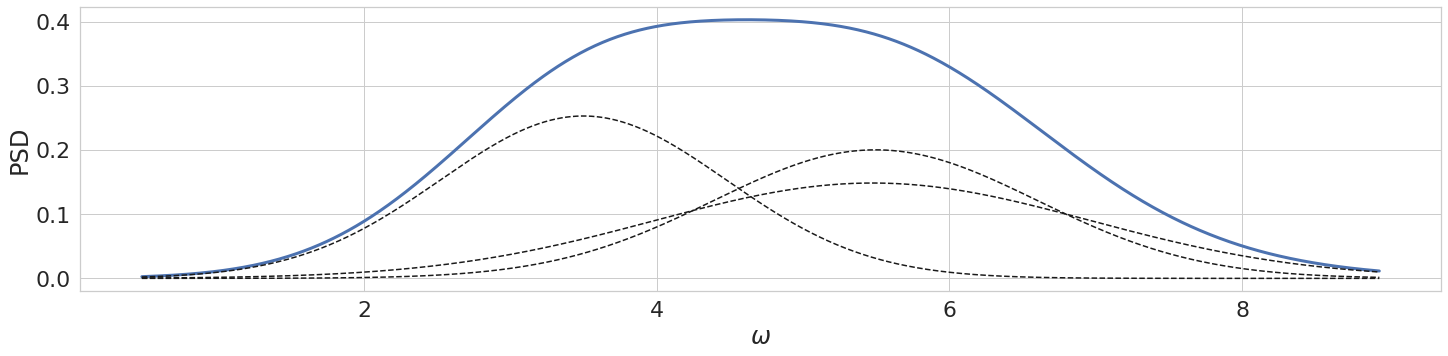

In [4]:
sm.init_params()
display(sm.get_params())
mogptk.plot_sm_psd(sm)

Building...
Optimizing...
Done


[{'mixture_weights': 0.1876886313144422,
  'mixture_means': array([0.95082035]),
  'mixture_scales': array([0.07378168])},
 {'mixture_weights': 2.1213521423260655,
  'mixture_means': array([0.01544269]),
  'mixture_scales': array([0.02888962])},
 {'mixture_weights': 0.08153149914860469,
  'mixture_means': array([0.95024805]),
  'mixture_scales': array([0.07794901])}]

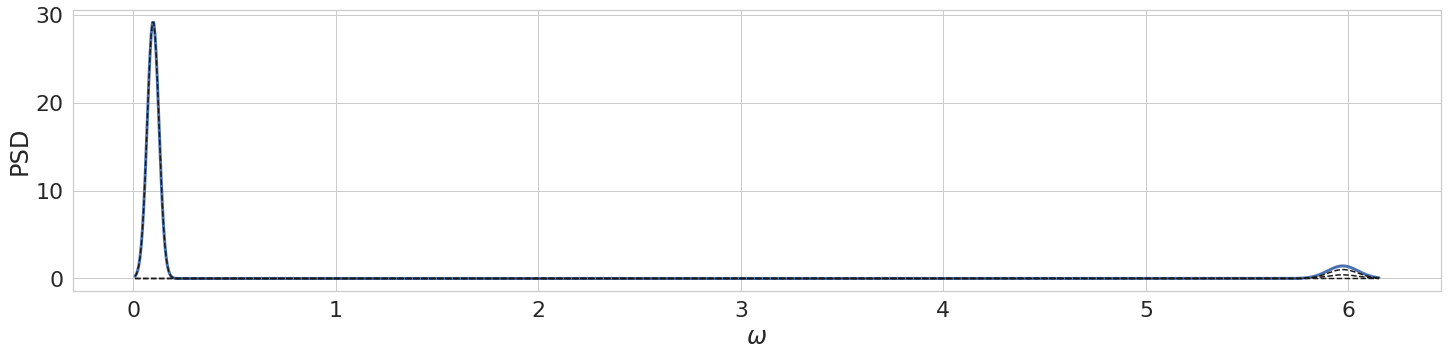

In [14]:
sm.train(method='Adam')
display(sm.get_params())
mogptk.plot_sm_psd(sm)

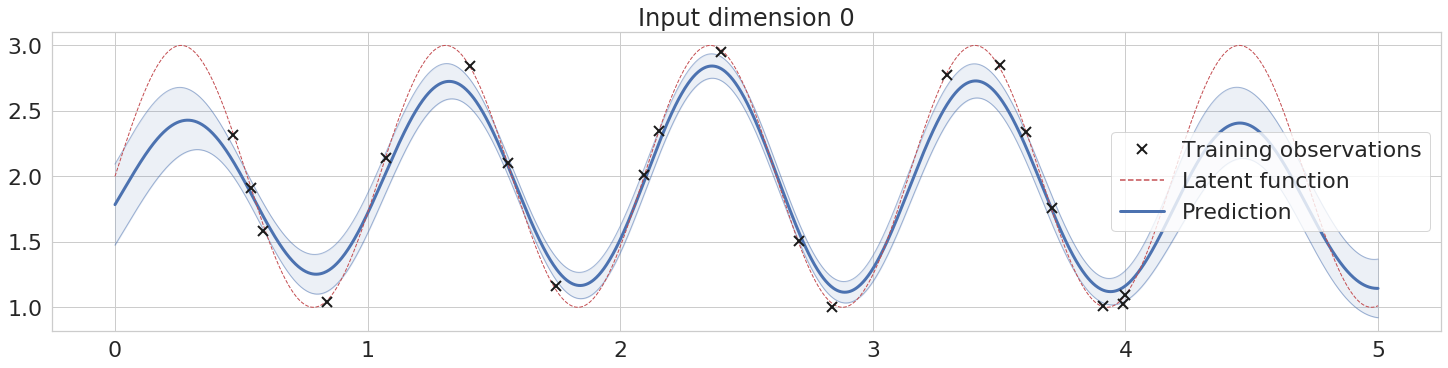

In [15]:
sm.set_prediction_range(0, 0.0, 5.0, n=2000)
sm.predict()
mogptk.plot(sm)

In [16]:
sm.save('sm')

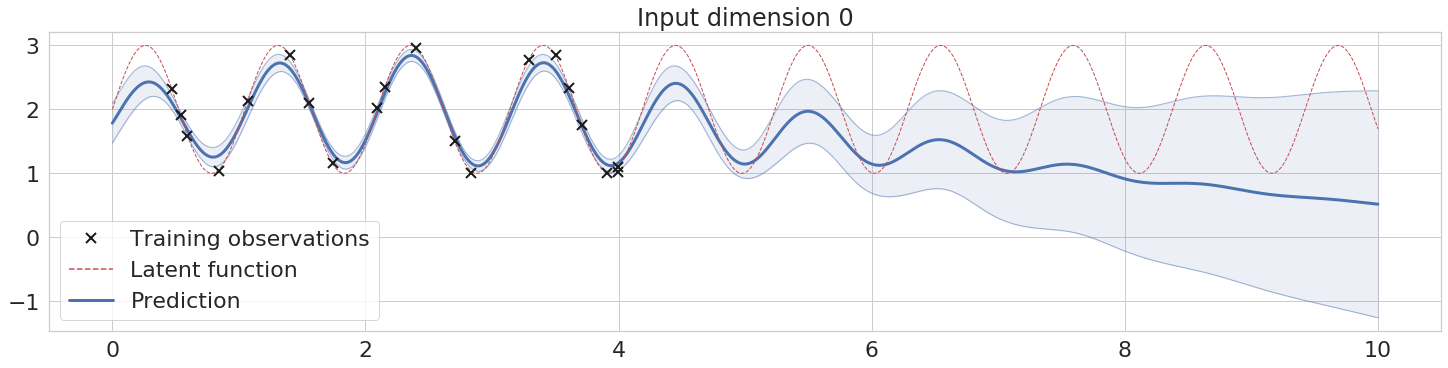

In [18]:
sm2 = mogptk.load('sm')
sm2.set_prediction_range(0, 0.0, 10.0, n=2000)
sm2.predict()
mogptk.plot(sm2)

## MOSM

In [19]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([0.01768429]),
  'mean': array([[-1.80523979]]),
  'variance': array([[0.00831862]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.10214613])},
 {'magnitude': array([-0.92543438]),
  'mean': array([[1.35180626]]),
  'variance': array([[0.69894727]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.61657117])},
 {'magnitude': array([0.76719495]),
  'mean': array([[-2.2059455]]),
  'variance': array([[0.68363826]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.85829607])}]

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -33.735460
  Number of iterations: 151
  Number of functions evaluations: 299


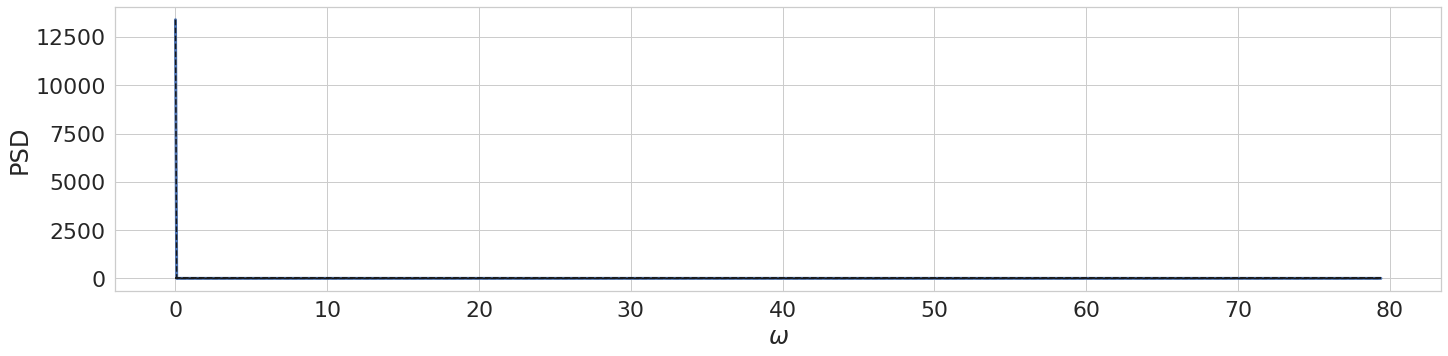

[{'magnitude': array([0.50183892]),
  'mean': array([[5.99404091]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.10214613])},
 {'magnitude': array([1.e-06]),
  'mean': array([[277.83424113]]),
  'variance': array([[83.25294098]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.61657117])},
 {'magnitude': array([3.97889844]),
  'mean': array([[6.28318531e-06]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.85829607])}]

In [21]:
mosm.init_params(plot=True)
display(mosm.get_params())

In [22]:
mosm.train()
display(mosm.get_params())

Building...
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -33.764407
  Number of iterations: 61
  Number of functions evaluations: 79
Done


[{'magnitude': array([14.0713995]),
  'mean': array([[5.994438]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.12339391])},
 {'magnitude': array([0.00165059]),
  'mean': array([[277.18614148]]),
  'variance': array([[83.24937167]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.28472815])},
 {'magnitude': array([4.0199048]),
  'mean': array([[2.12509501e-06]]),
  'variance': array([[1.e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([2.50620808])}]

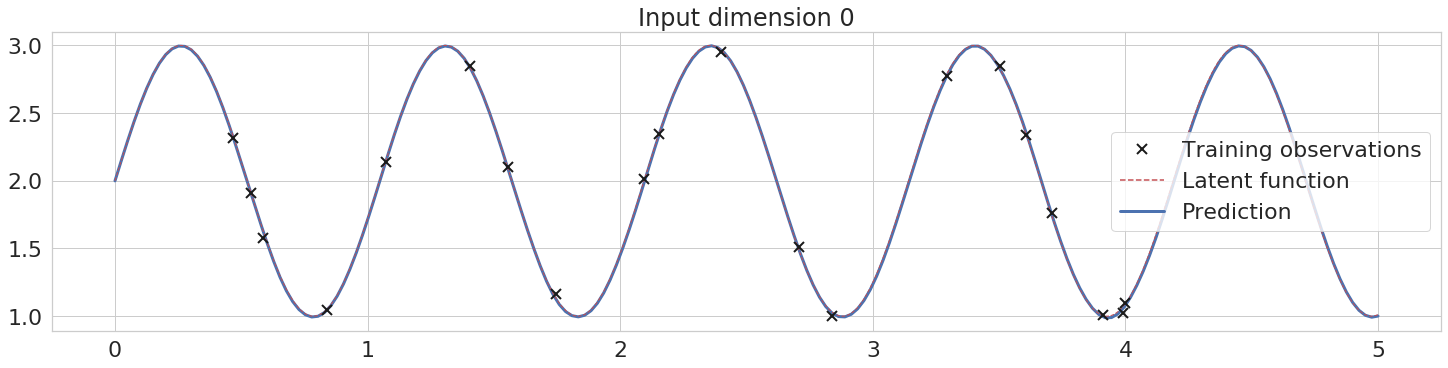

In [24]:
mosm.set_prediction_range(0, 0.0, 5.0, n=200)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [25]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[-0.18692579]]),
  'mean': array([0.39960488]),
  'variance': array([0.86991029])},
 {'constant': array([[0.32583589]]),
  'mean': array([0.66546762]),
  'variance': array([0.10613175])},
 {'constant': array([[-2.08434473]]),
  'mean': array([0.32323384]),
  'variance': array([0.35005656])}]

INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -47.774631
  Number of iterations: 74
  Number of functions evaluations: 142


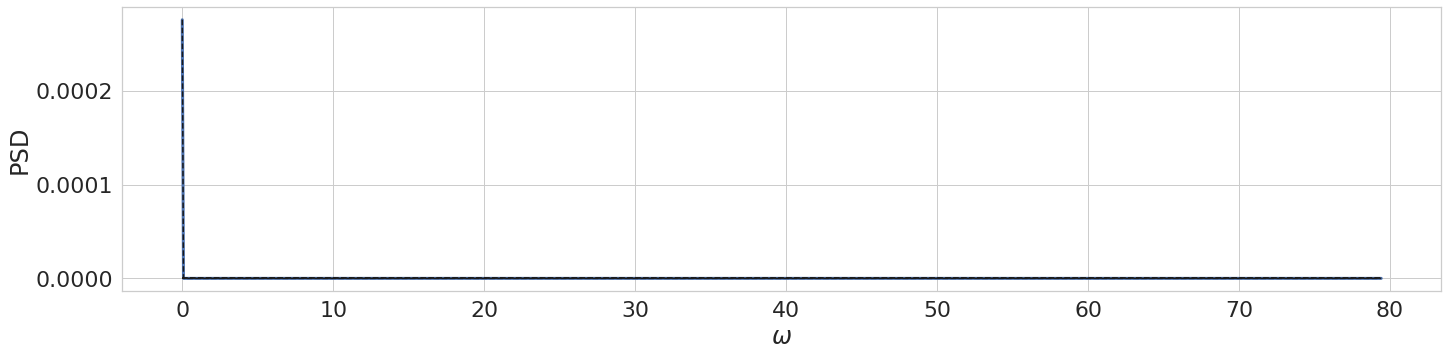

[{'weight': array([[1.e-06]]), 'mean': array([[6.28318531e-06]]), 'scale': array([[163.67142908]])}, {'weight': array([[0.13221241]]), 'mean': array([[5.99404169]]), 'scale': array([[1.e-06]])}, {'weight': array([[0.25822575]]), 'mean': array([[6.28318531e-06]]), 'scale': array([[1.e-06]])}]
{'weight': array([1., 1., 1.]), 'mean': array([[6.28318531e-06],
       [5.99404169e+00],
       [6.28318531e-06]]), 'scale': array([[1.63671429e+02],
       [1.00000000e-06],
       [1.00000000e-06]])}


[{'constant': array([[-0.16616721]]),
  'mean': array([6.28318531e-06]),
  'variance': array([1.e-06])},
 {'constant': array([[0.289651]]),
  'mean': array([5.99404169]),
  'variance': array([1.e-06])},
 {'constant': array([[-1.85287301]]),
  'mean': array([6.28318531e-06]),
  'variance': array([163.67142908])}]

In [33]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [34]:
smlmc.train()
display(smlmc.get_params())

Building...
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -33.620973
  Number of iterations: 60
  Number of functions evaluations: 91
Done


[{'constant': array([[-1.84475988]]),
  'mean': array([6.28190589e-06]),
  'variance': array([1.e-06])},
 {'constant': array([[0.70343965]]),
  'mean': array([5.99416444]),
  'variance': array([1.e-06])},
 {'constant': array([[6.88362919e-07]]),
  'mean': array([6.28318531e-06]),
  'variance': array([163.64336981])}]

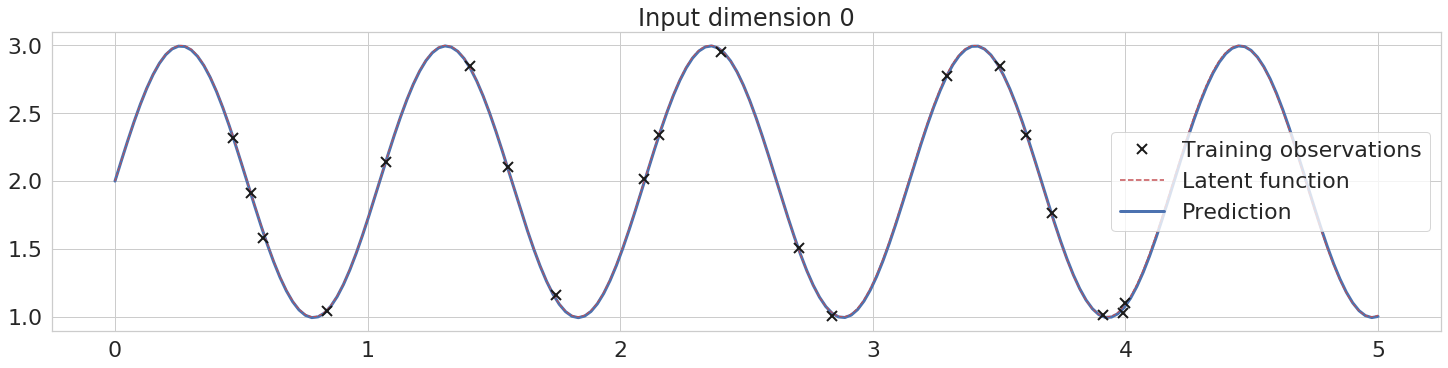

In [35]:
smlmc.set_prediction_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [36]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.44176735]]),
  'mean': array([0.8327848]),
  'variance': array([0.83039116]),
  'phase': array([[0.]])},
 {'constant': array([[0.01810198]]),
  'mean': array([0.12299057]),
  'variance': array([0.14933628]),
  'phase': array([[0.]])},
 {'constant': array([[0.22981988]]),
  'mean': array([0.58105342]),
  'variance': array([0.45019945]),
  'phase': array([[0.]])}]

In [37]:
csm.init_params()
display(csm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -47.819925
  Number of iterations: 69
  Number of functions evaluations: 84


[{'constant': array([[0.44176735]]),
  'mean': array([6.28318531e-06]),
  'variance': array([1.e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.01810198]]),
  'mean': array([5.99425768]),
  'variance': array([1.e-06]),
  'phase': array([[0.]])},
 {'constant': array([[0.22981988]]),
  'mean': array([3.12480333]),
  'variance': array([1.70557444e-05]),
  'phase': array([[0.]])}]

In [38]:
csm.train()
display(csm.get_params())

Building...
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -33.620972
  Number of iterations: 58
  Number of functions evaluations: 79
Done


[{'constant': array([[3.4035089]]),
  'mean': array([6.28093789e-06]),
  'variance': array([1.e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.49484865]]),
  'mean': array([5.99416401]),
  'variance': array([1.e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[1.00008645e-06]]),
  'mean': array([0.00447236]),
  'variance': array([1.60610885e-05]),
  'phase': array([[1.e-06]])}]

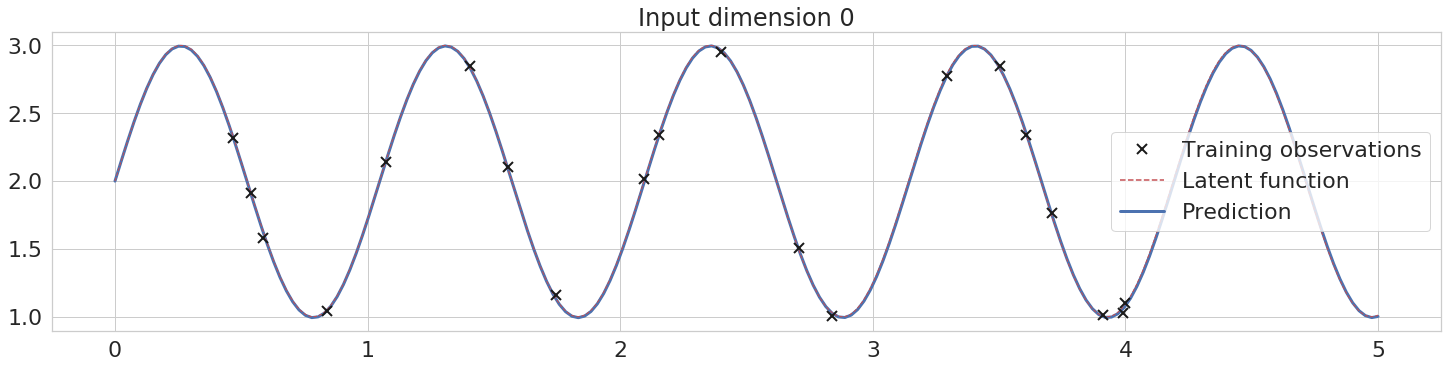

In [39]:
csm.set_prediction_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot(csm)

## CG

In [ ]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

In [ ]:
cg.init_params()
display(cg.get_params())

In [ ]:
cg.train()
display(cg.get_params())

In [ ]:
cg.set_prediction_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot(cg)